---
title: "Neural Network from scratch using Excel"
execute: 
  enabled: false
  freeze: true
date: "6/26/2024"
date-modified: "6/26/2024"
categories: [neural network, excel]
---


> Built (and train) simple neural network using Excel solver

Let's make a simple neural network using Excel. We are using the classic Iris dataset for this exercise.

The dataset has 6 columns and 150 rows. It is a balanced dataset with 3 categorical targets (Iris-setosa, Iris-versicolor, Iris-virginica) with 50 rows belonging to each target species. We are trying to predict the flower species of each row, based on its physical attributes (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm).

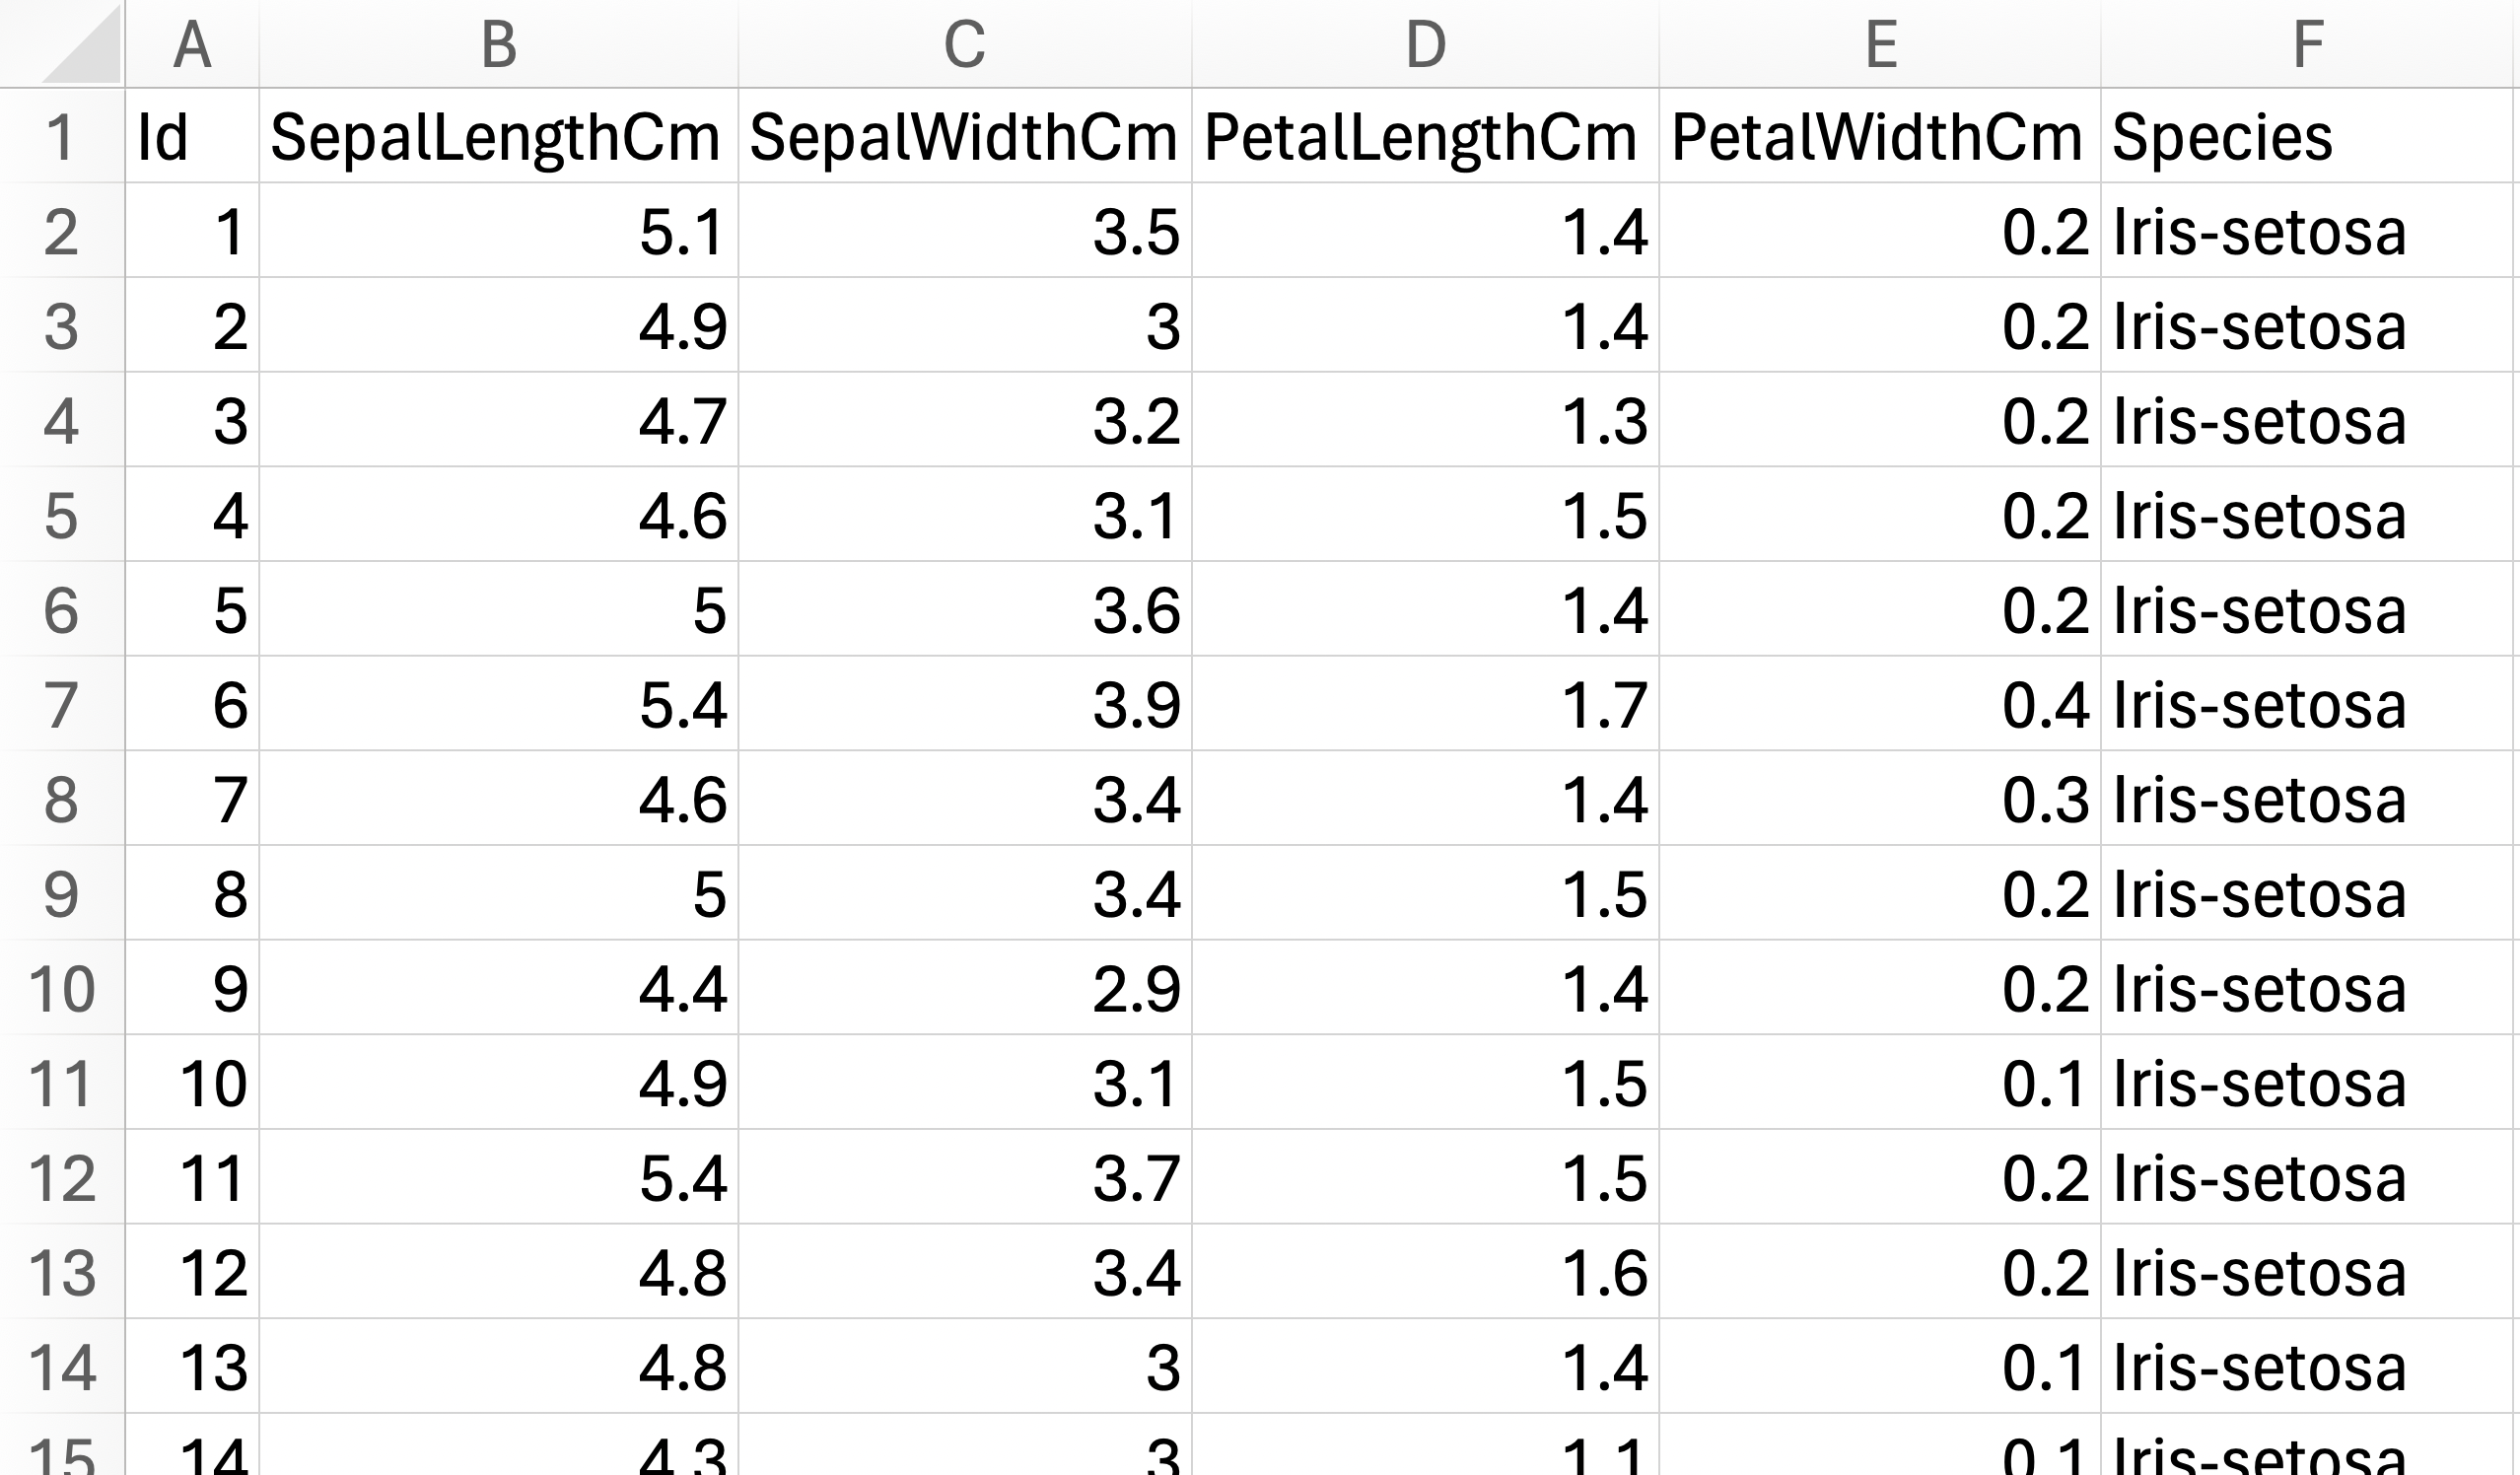


# Preprocessing

The original data is faily clean and has no null entries for any of the columns, so the only preprocessing steps we need to do are:


1. Remove unnecessary column (`Id`).
2. Categorical encode non-numerical column (`Species`). We used simple `IF(E2="Iris-setosa",1,IF(E2="Iris-versicolor",2,3))` condition. 



Here is result after our minimal preprocessing steps.
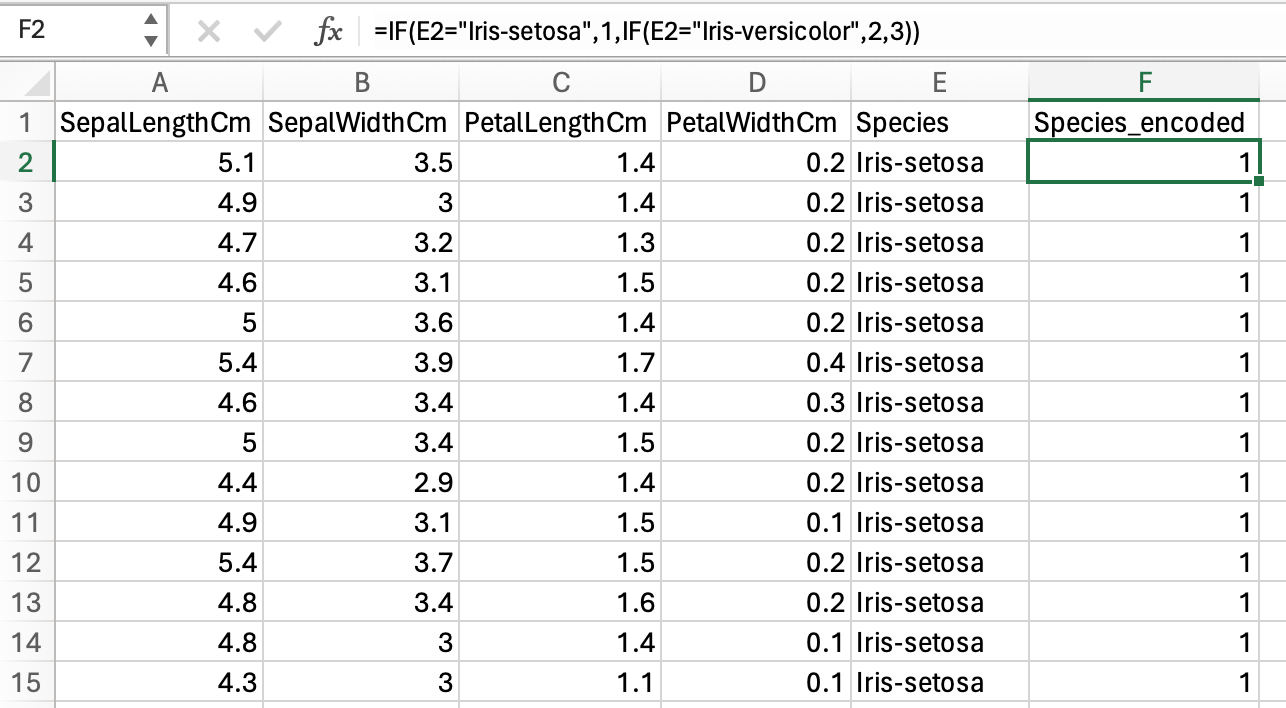

Here is a quick pivot table to verify that our `Species_encoded` target works as we had expected.
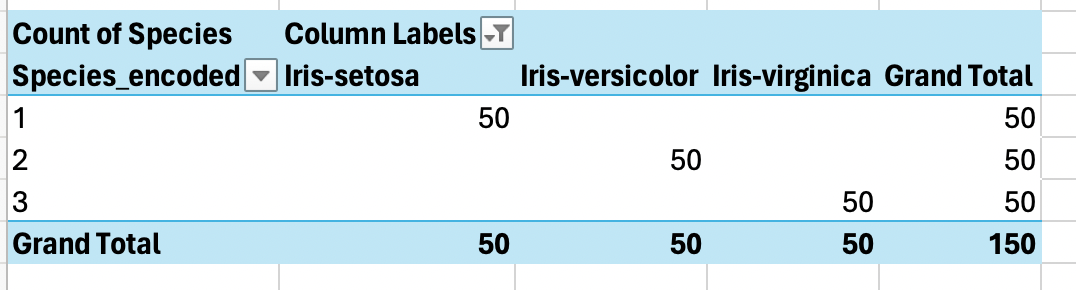

Some other additional preprocessing we might need to do are:


- If our data has column with values that are way bigger than the rest of the columns (eg salary column, vs age column), then we need to normalize these big values columns. Otherwise, these big values columns will carry more weights in our prediction compared to other columns even when they are not necessarily important. One method is to change the values distribution to be between 0..1 using minmax formula.


- If our data has column that exhibit exponential distribution (eg normally things to do with money, growth - bacterial growth, population growth etc), we can convert it to log value to change the one-sided tailed distribution into fairly normal distribution. This can be helpful because most of machine learning algorithm assumes normal distribution. We can use `log(x + 1)`, here, we `+1` to take care of 0 values in our data, because log(0) is undefined.


- If we have categorical features, we need to encode it into numbers because models need to work with numbers. Often, we would use one-hot encoding instead of just encoding it into sequential numbers like how we encoded the `Species` column above. This is because sequential numbers has natural ordering, and the model might learn this ordering even when it is not intended. We did not use one-hot encoding for our `Species` column above because it is our target variable.


# Linear Model
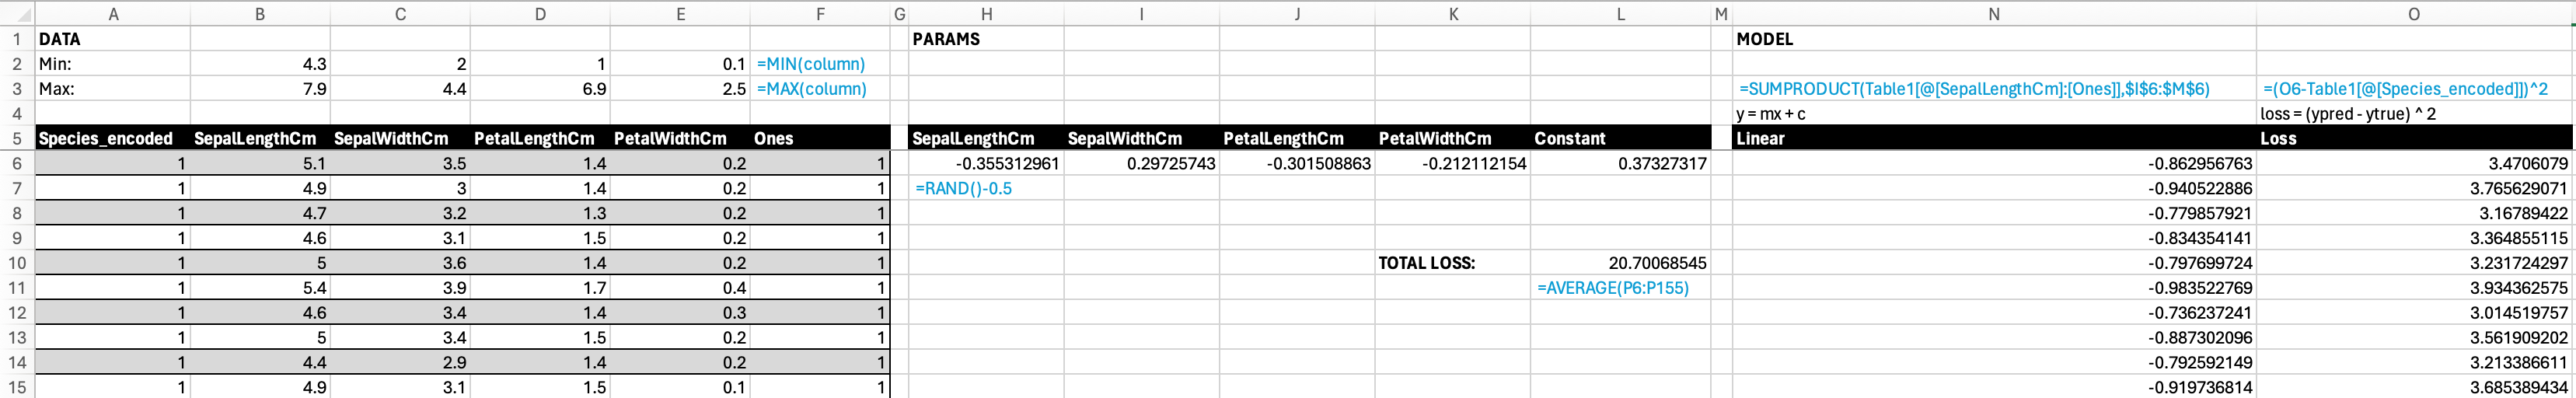

DATA:


1. All rows under column A6:E6 are our preprocessed data from the previous step. We add column `Ones` in F5 (values of 1 for all rows) for the constant term (`+ c`) in `y = mx + c` linear regression formula.
2. In cells B2:E2 are `MIN()` for each columns; and in column B3:E3 are `MAX()` for each columns. We do this to verify that none of the columns are way bigger/smaller than the rest.


PARAMS:


1. In cells H6:L6 are random coefficients for each of our feature columns. We use `RAND()-0.5` to get random values. We do `- 0.5` to get small coefficients.

MODEL:

1. All rows under column N5 are ypred returned from our linear model (`y = mx+c`). We use the formula `SUMPRODUCT(feature columns, params)`. The breakdown of sumproduct formula is `(column A value * column A param) + (column B value * column B param) + (column N value * column N param)`, where column A..N is our feature columns' value and param respectively. I think it is easier to see here that `... + (Ones value * Constant)` is equivalent to `+ (1 * Constant)`, which is the same as `+ Constant`. This is what we meant in bullet point DATA.1.
1. All rows under column O5 are loss (`(ypred - ytrue)^2`) for each row's prediction.
1. In cell L10 is our average total loss `AVERAGE(loss column)`.

SOLVE:


1. We can now optimize using built-in gradient descend algorithm in excel (Data tab --> Solver).
    - Total loss as our objective that we want to minimize.
    - Params cells as the thing we want to change to get the minimal total loss.


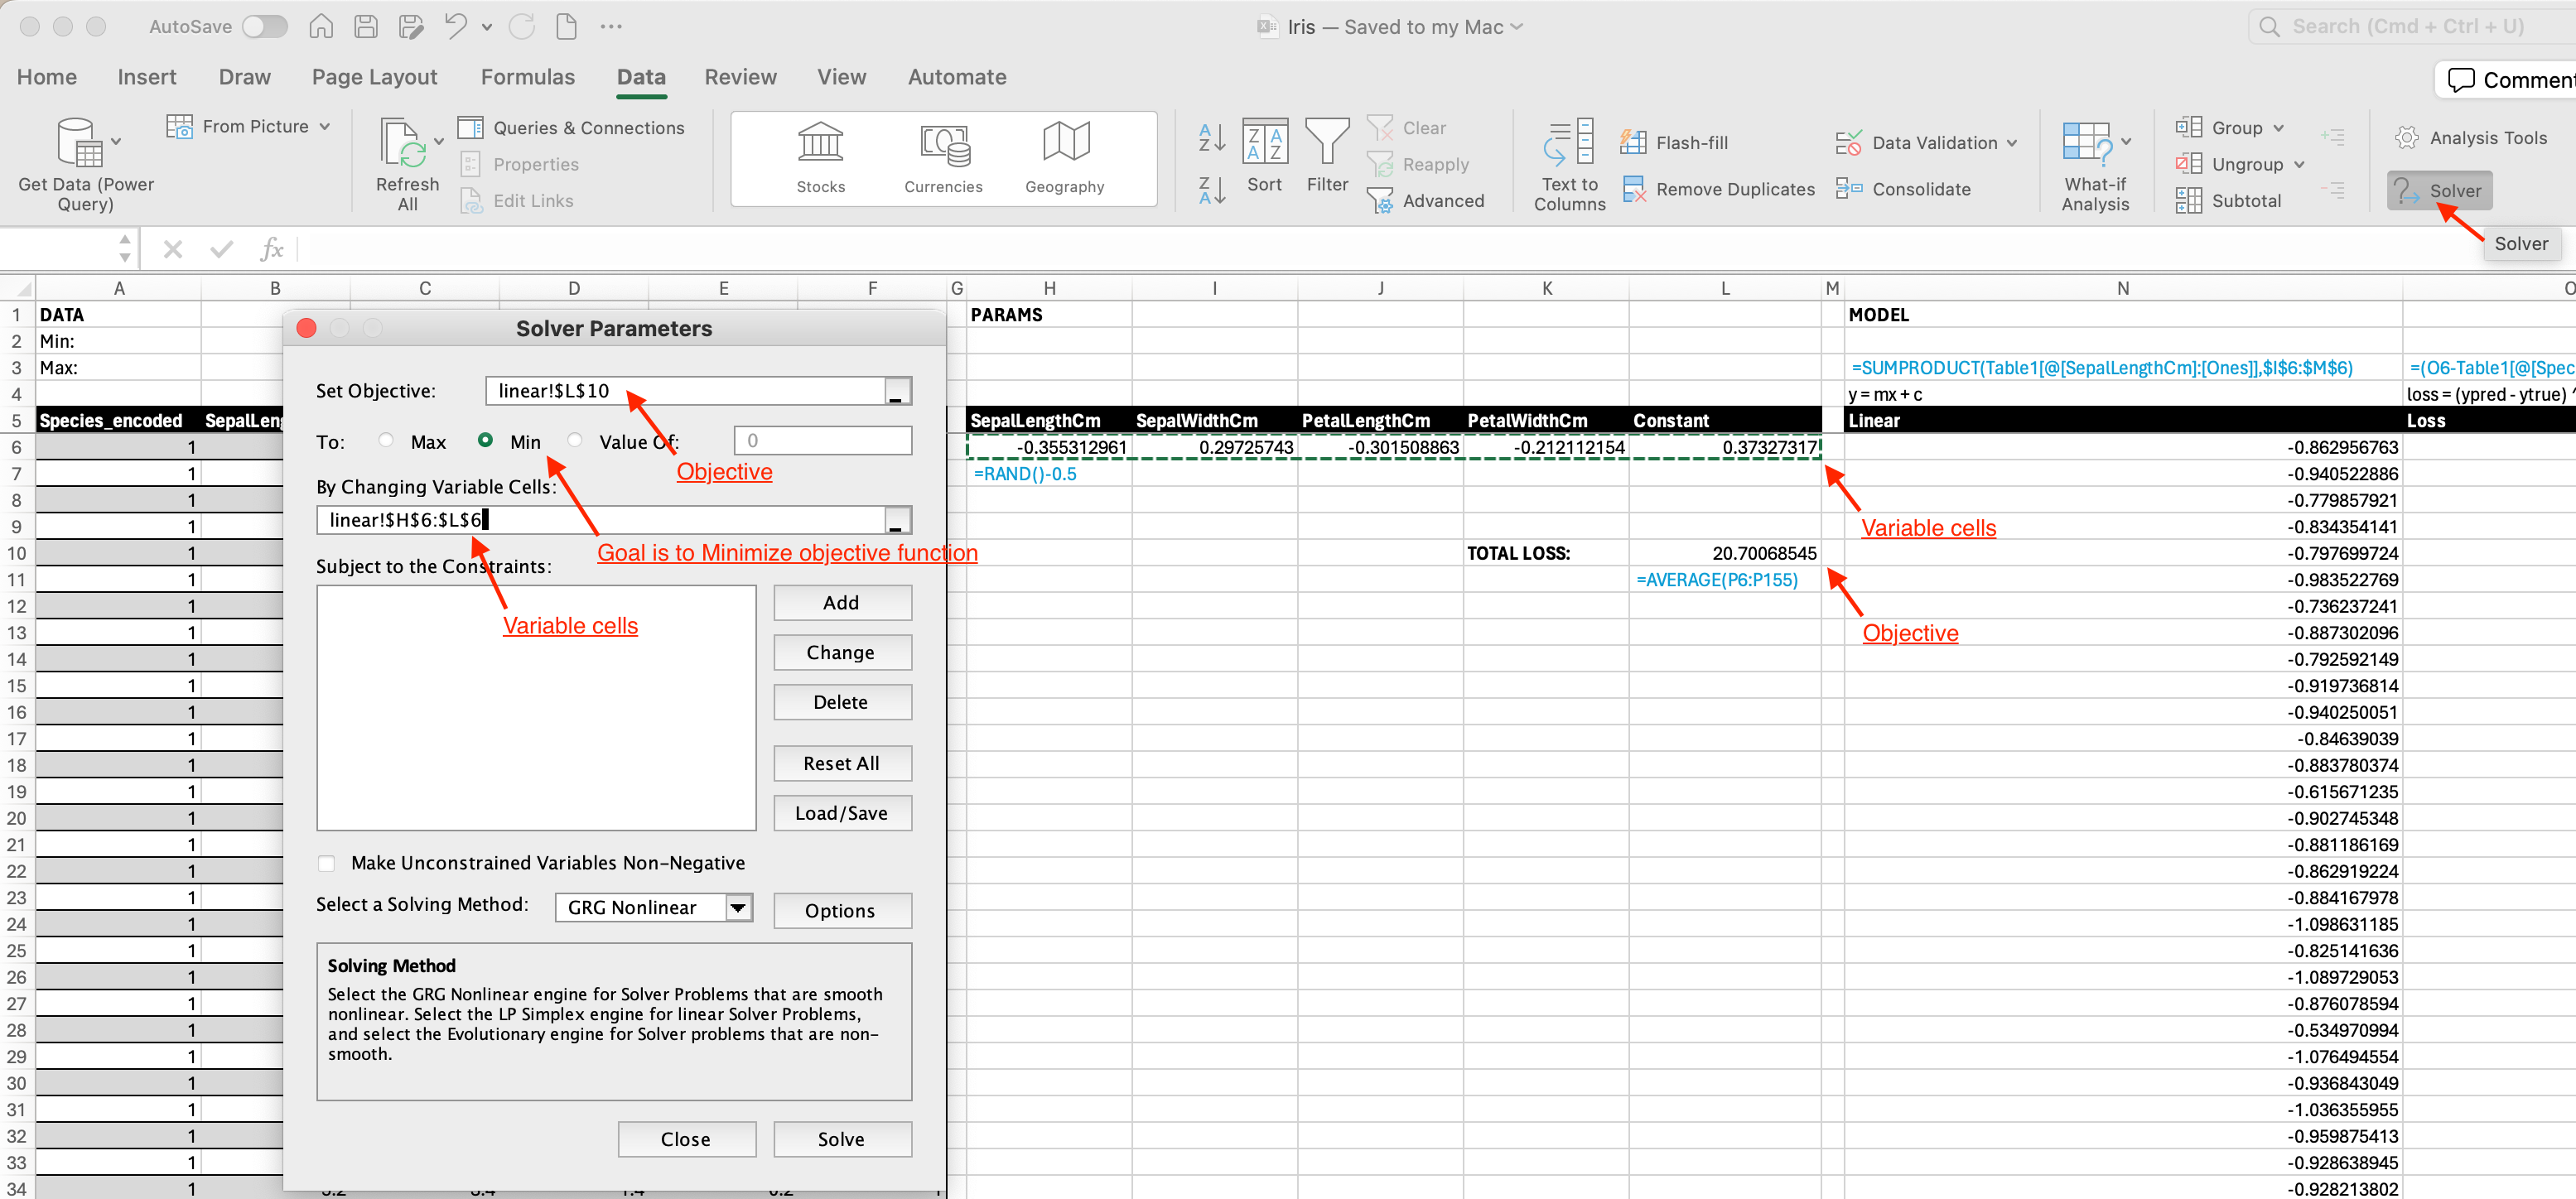


2. Here is the result from solver. We see that our total loss has decreased from 20.7 to 0.04. 
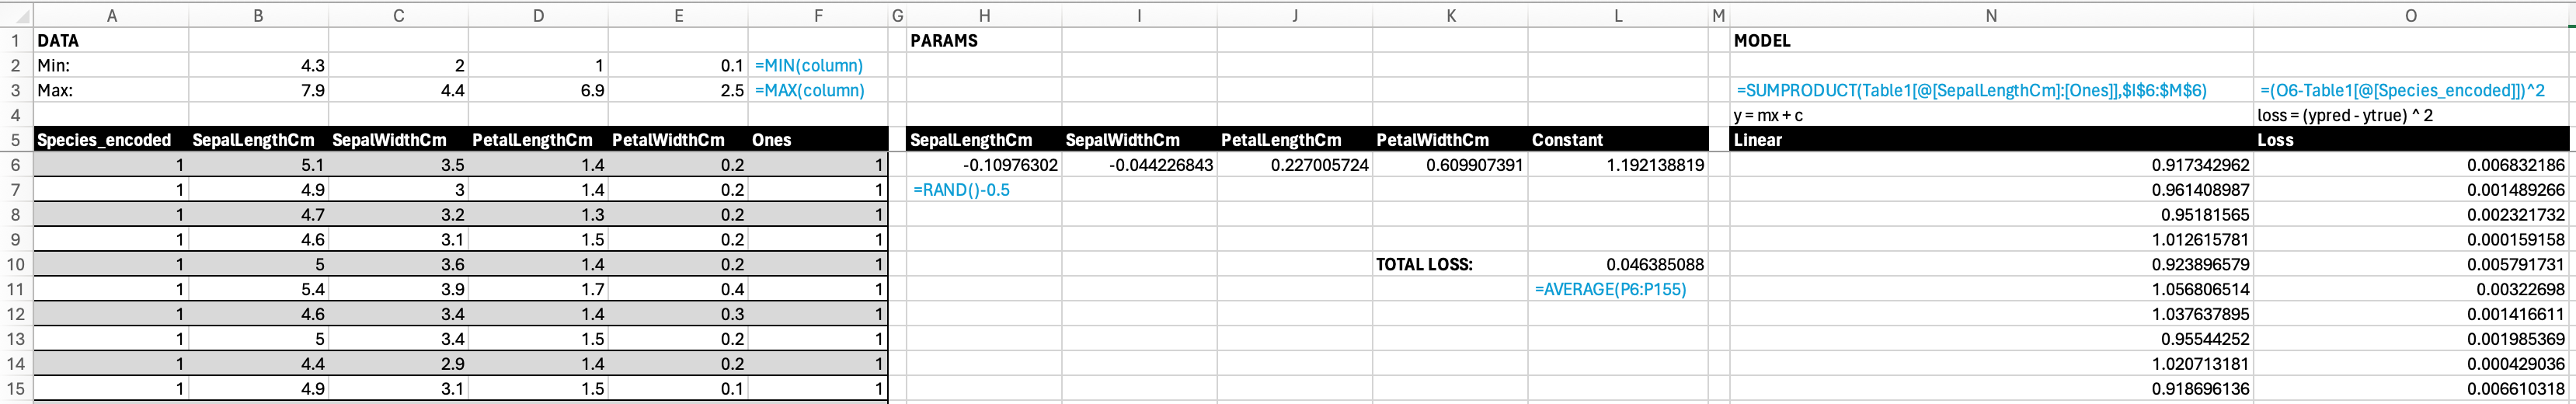

The loss decreases, so all is good. But this is not neural network yet, this is just regression.

# Neural Network
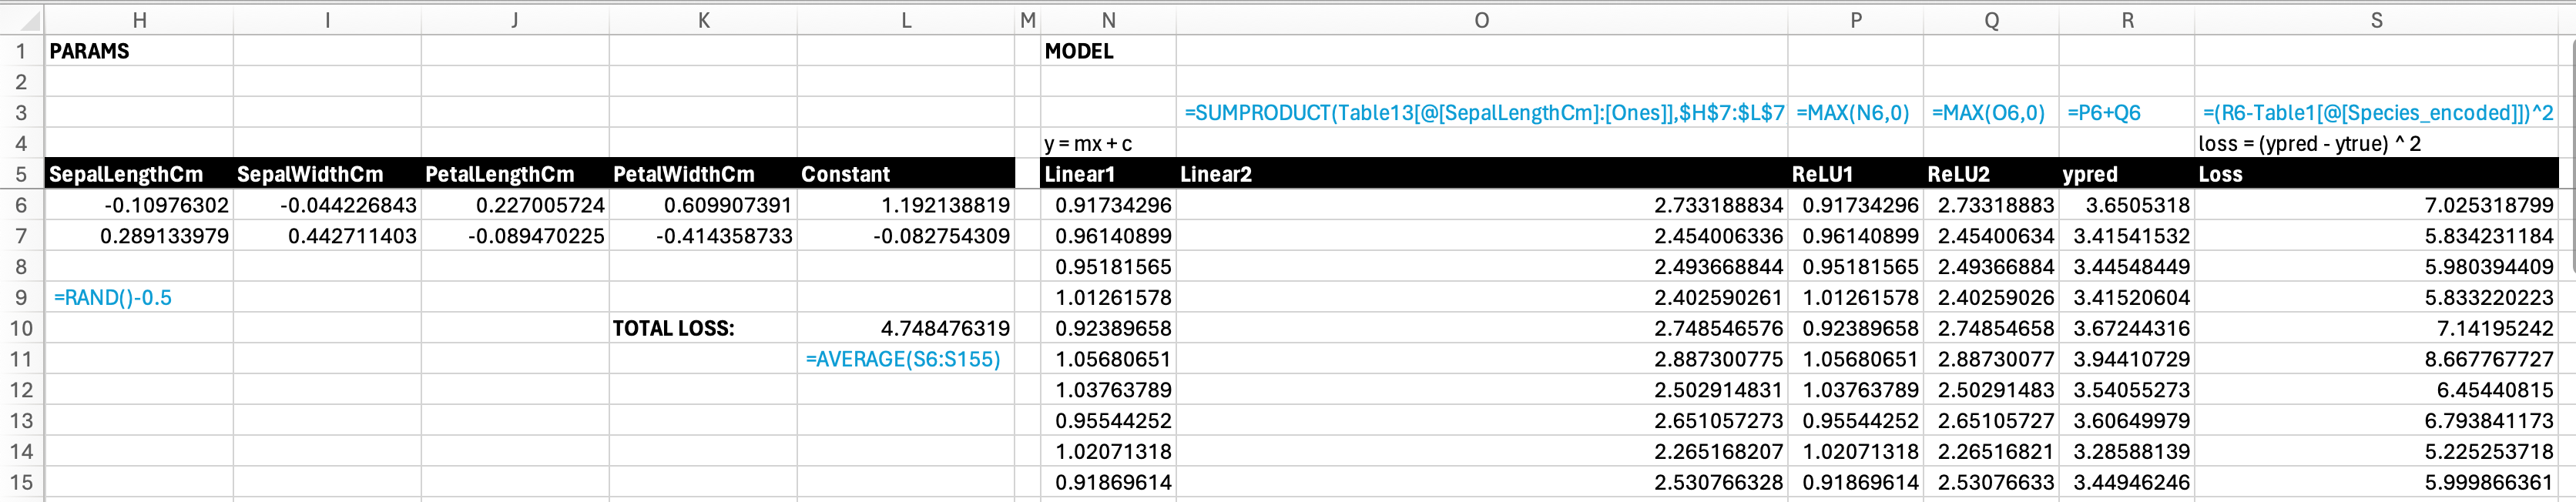

DATA:

1. All of our data is the same as in previous section.

PARAMS:

1. Now we add another set of coefficients for each of our features, in cells H7:L7.



MODEL:


1. For each of the param set, we do sumproduct.
    - Under column `Linear1` is `SUMPRODUCT(feature columns, params in H6:L6)`. This is the same as in previous section.
    - Under column `Linear2` is `SUMPRODUCT(feature columns, params in H7:L7)`.

2. If we just add `Linear1 + Linear2`, then the formula would still be linear regression. So, we need to add nonlinear function. Nonlinear function is also called activation function. Nonlinear function breaks this linearity so that our model is no longer a linear model. The nonlinear function we add here is ReLU, using formula `MAX(0, Linear1)` and `MAX(0, Linear2)`.

    Here, we can observe that adding just linear layers without non-linearity would still give linear regression formula. Assume that $y_a$ is ypred from `Linear1` and $y_b$ is ypred from `Linear2`:
$$y_a = m_{1a}x_1 + m_{2a}x_2$$
$$y_b = m_{1b}x_1 + m_{2b}x_2$$
$$y_a + y_b = (m_{1a}x_1 + m_{2a}x_2) + (m_{1b}x_1 + m_{2b}x_2)$$




3. Under column R6 is our ypred, using formula `ReLU1 + ReLU2`.

SOLVE:


1. We can now solve the model using excel solver.


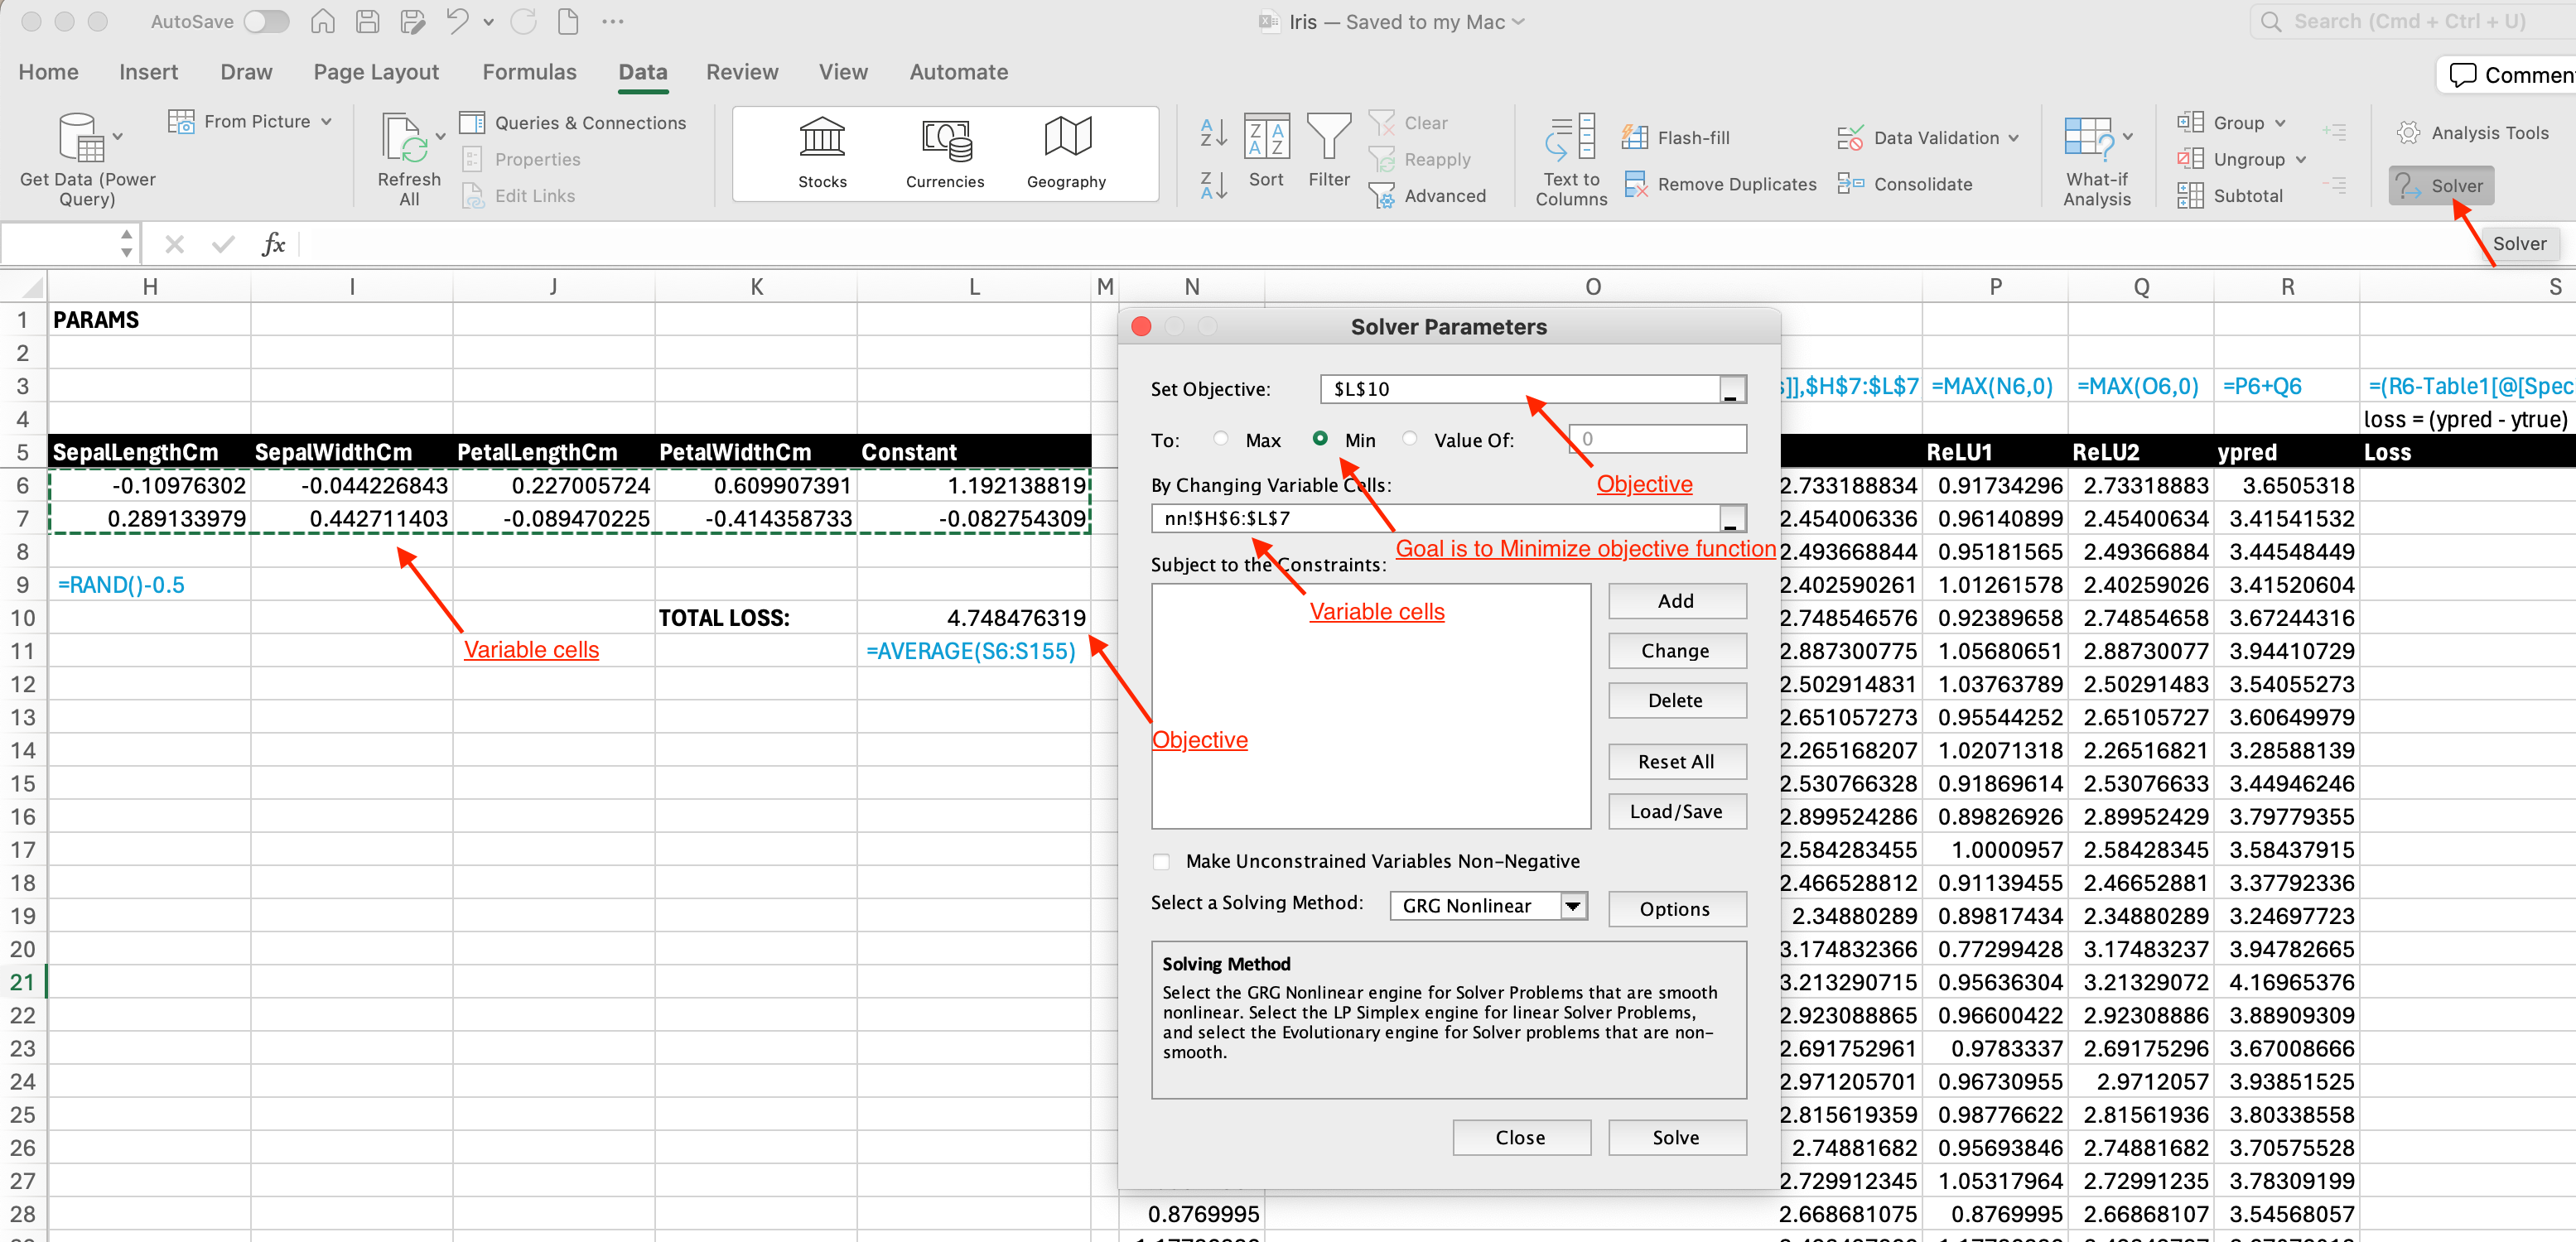

2. Here is the result from solver. Our loss reduced from 4.74 to 0.03. This is also slightly better from the loss using linear model (0.04). Great! We've built a neural network from scratch using excel.
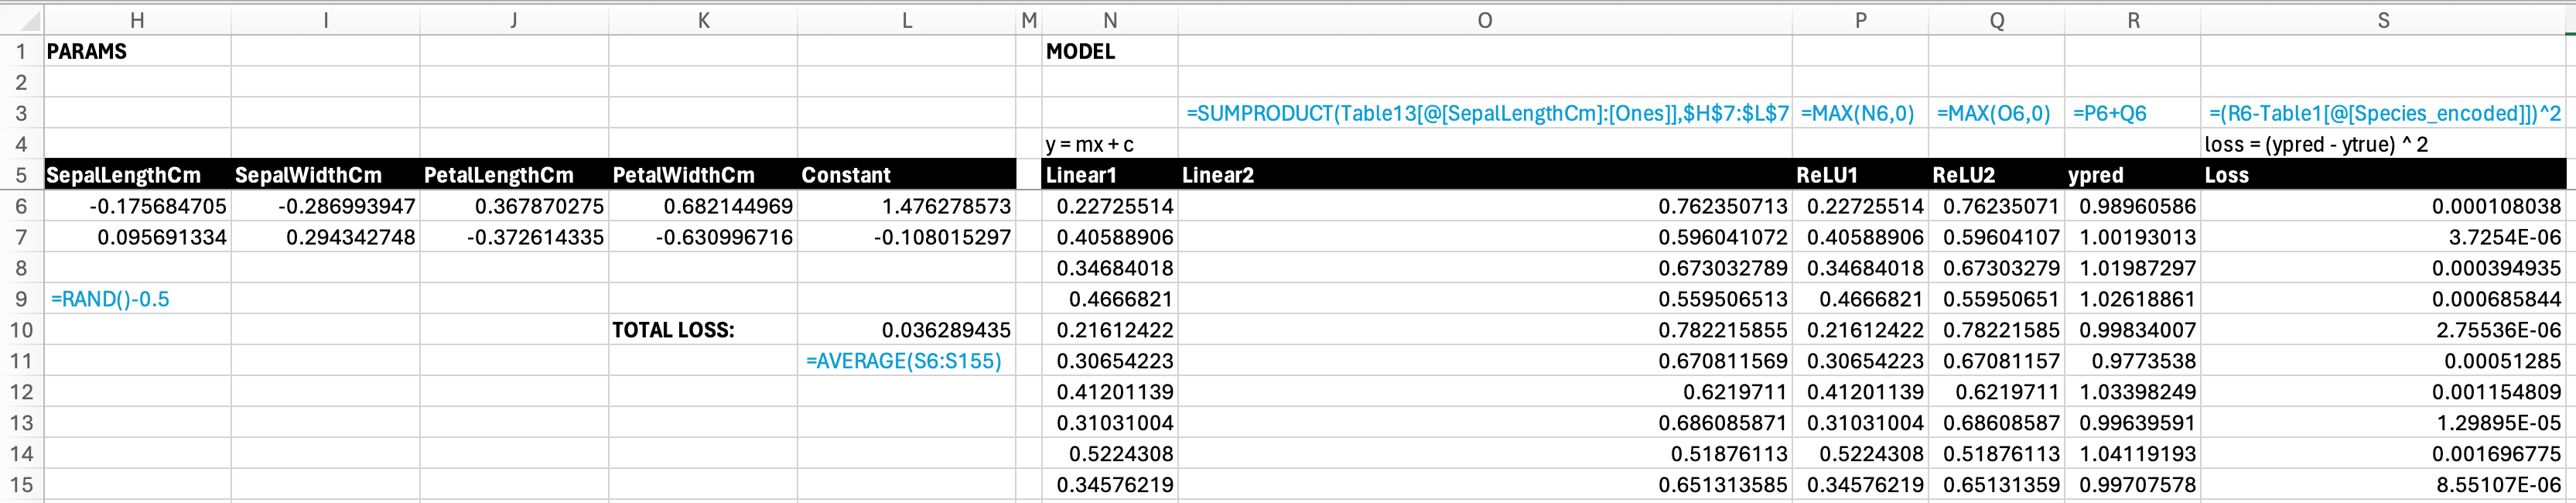

## Matrix Multiplication
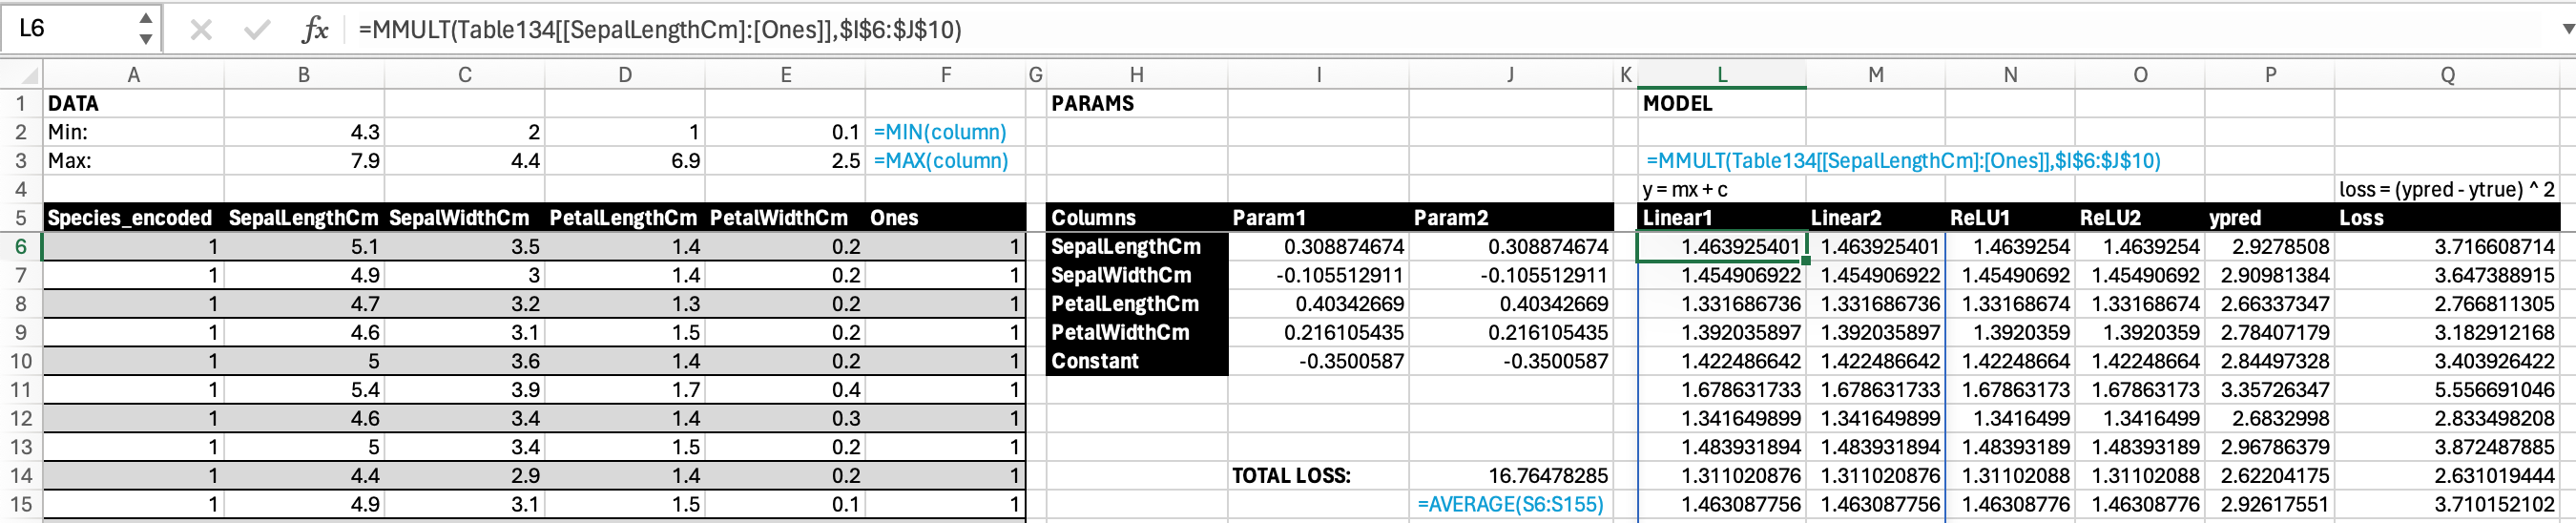
1. We can also achieve the same thing using matrix multiplication formula `MMULT(all cells in features table, all cells in params table)`. Notice that our PARAMS now is transposed. Previously our coefficient values are in row 6 and 7, now they are in column I and J.
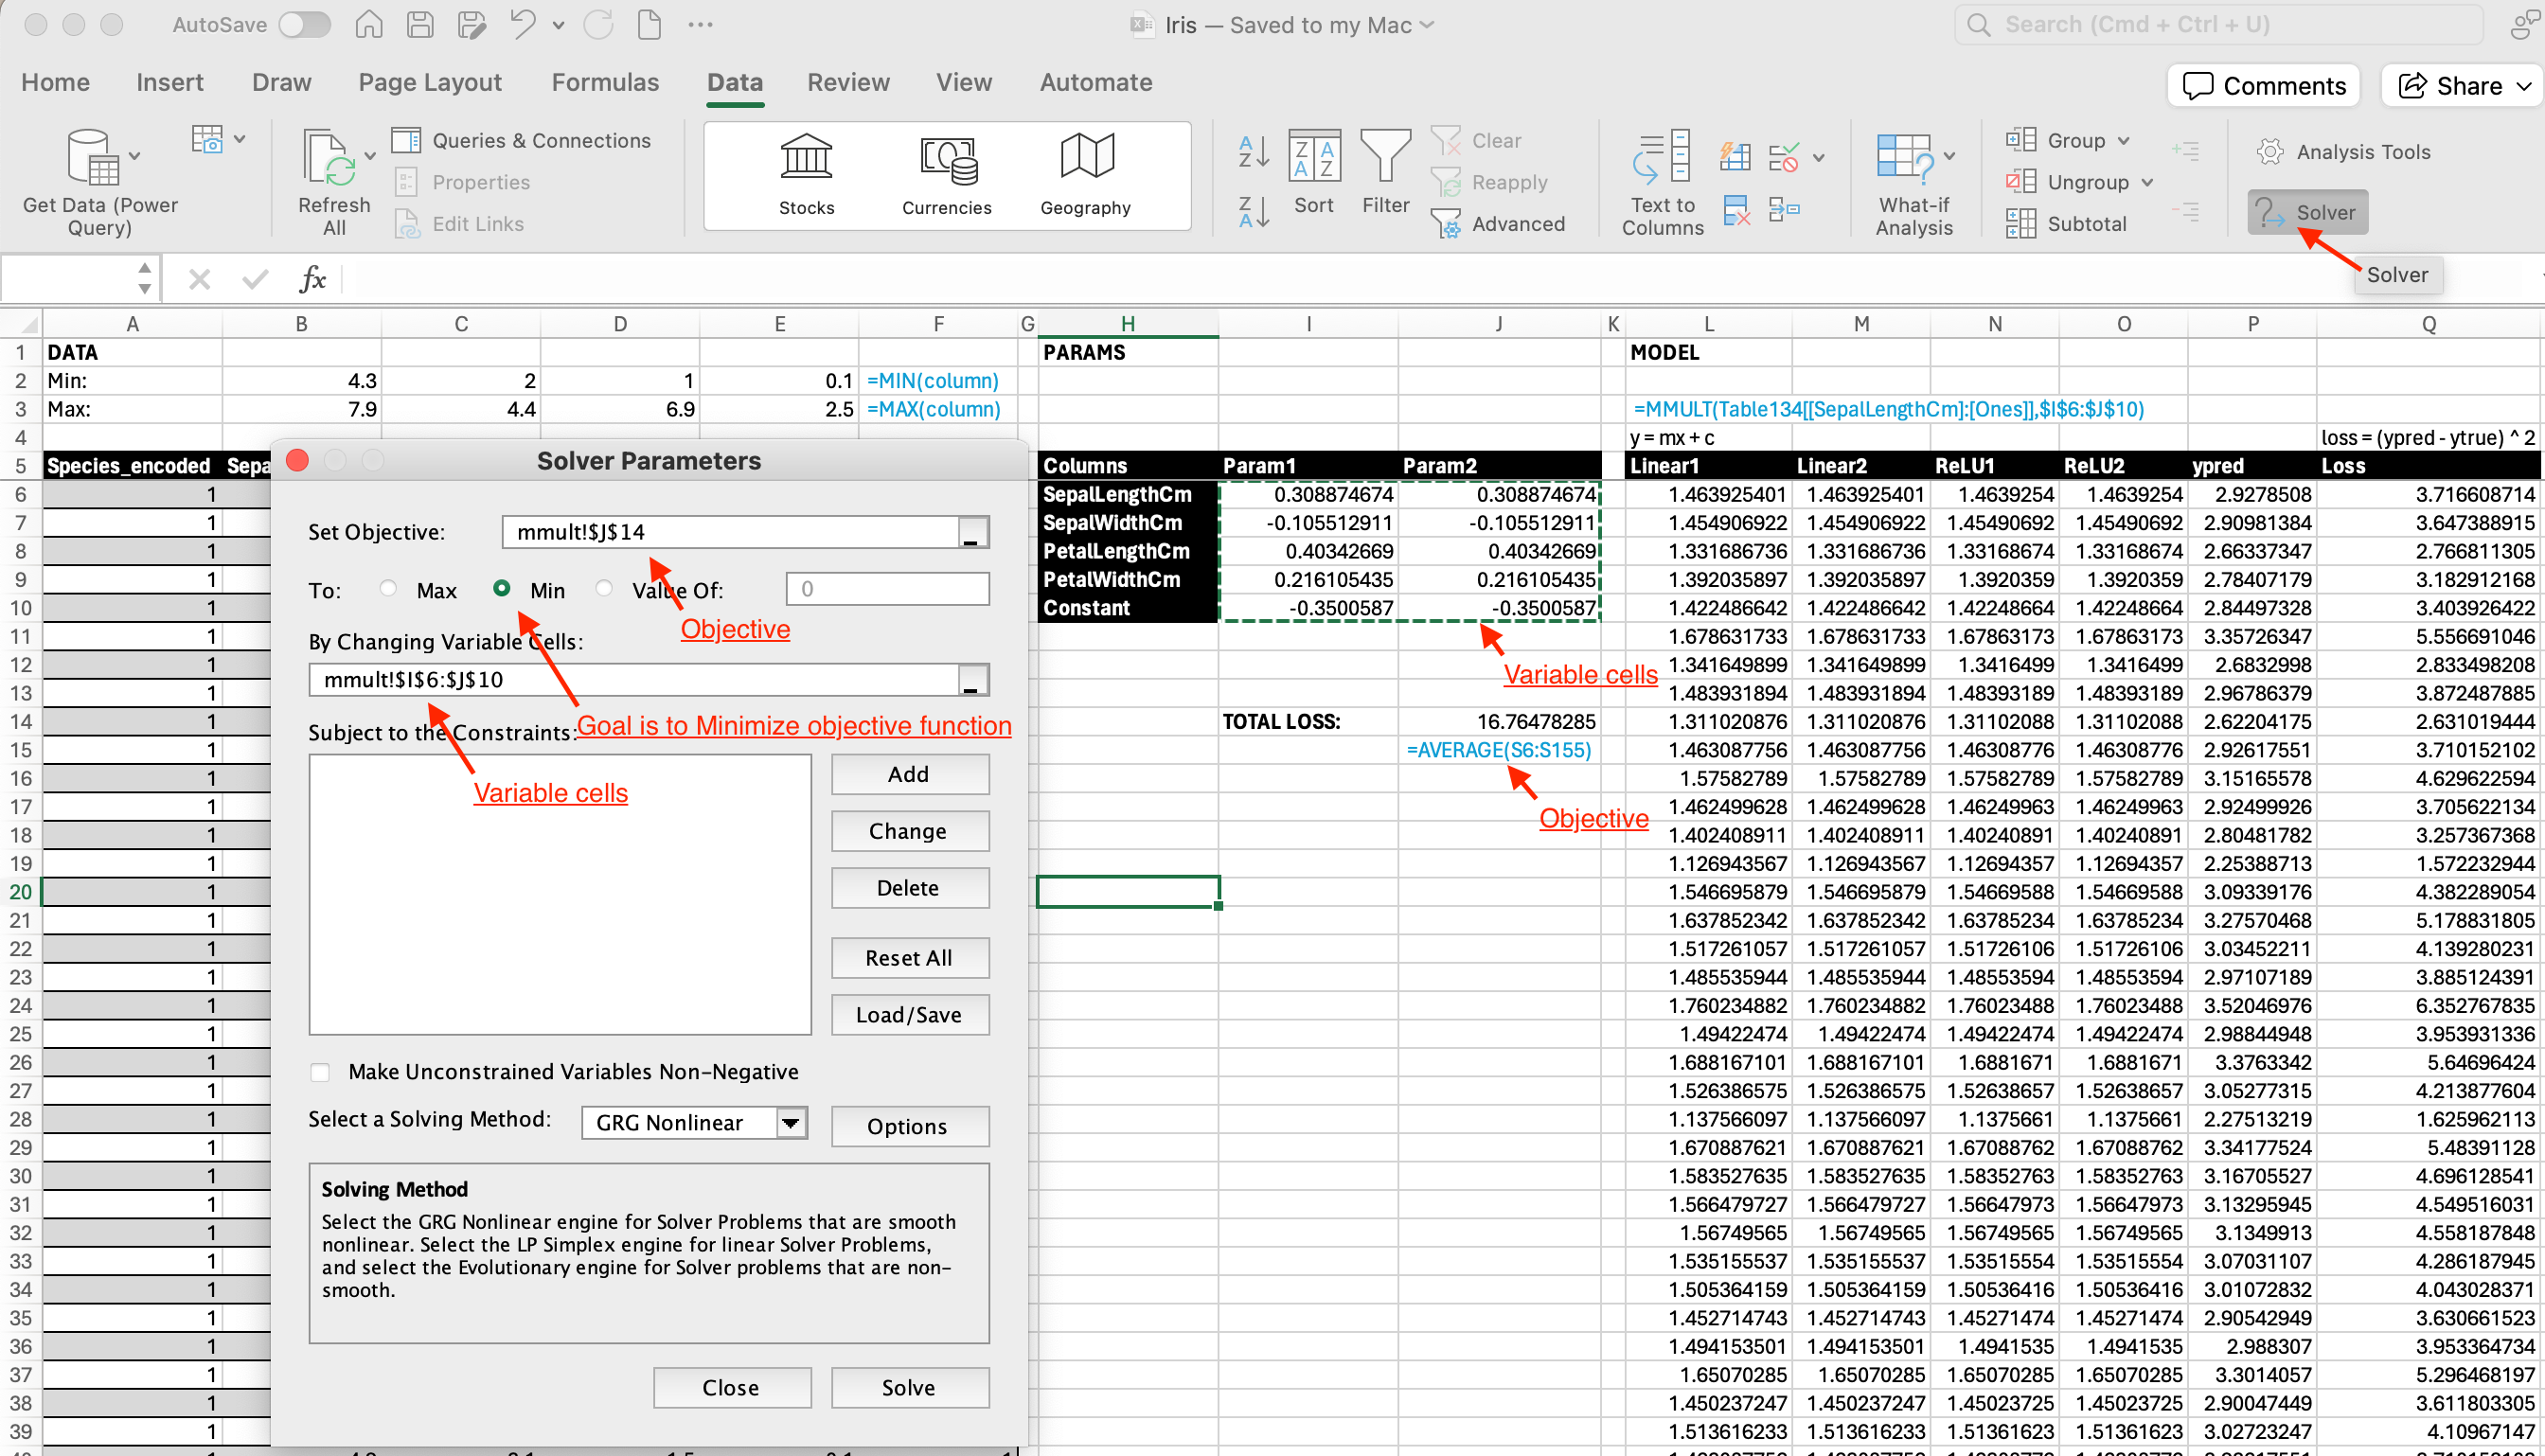

2. Here is the result from solver. Notice that we get the same result (0.03) as previous.
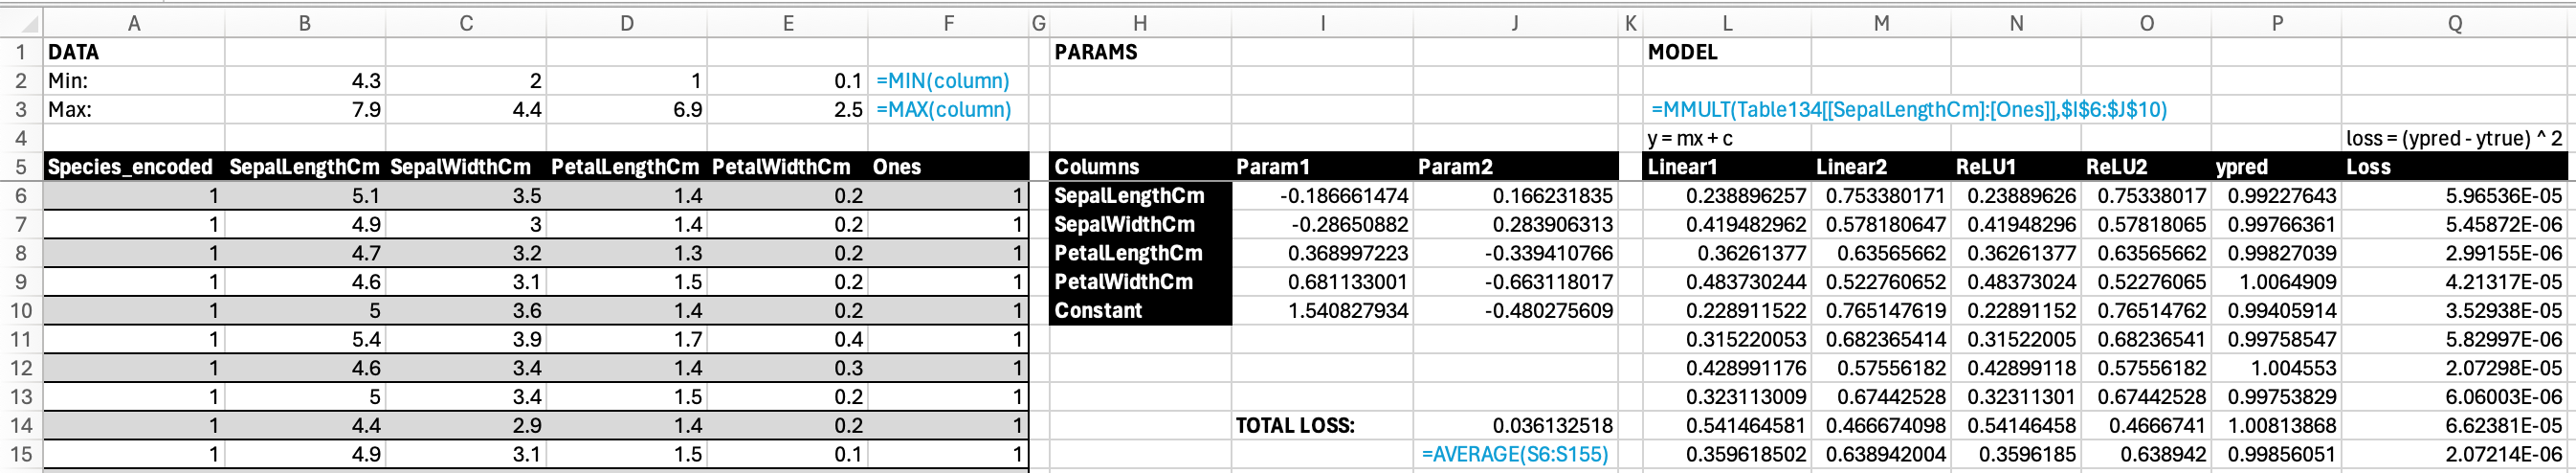

# Conclusion
We've successfully created a neural network from scratch in excel albeit for a very simple dataset. Here is the <a href="/data/blog-feed_forward_nn_in_excel-Iris.xlsx">final excel file</a> we've created. :)

#### Reference & credit:


[1] <a href="https://course.fast.ai/Lessons/lesson3.html">Practical Deep Learning for Coders: Lesson 3</a>